In [25]:
import os
import joblib
import numpy as np
from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import save_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

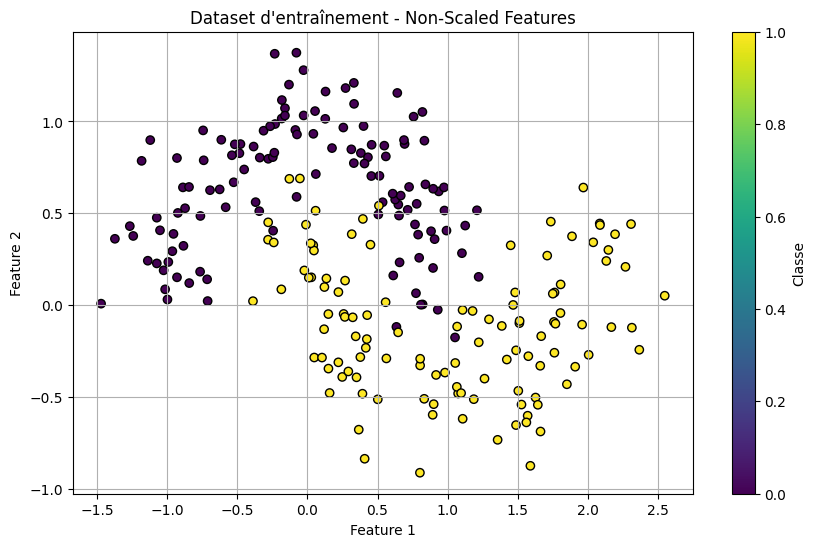

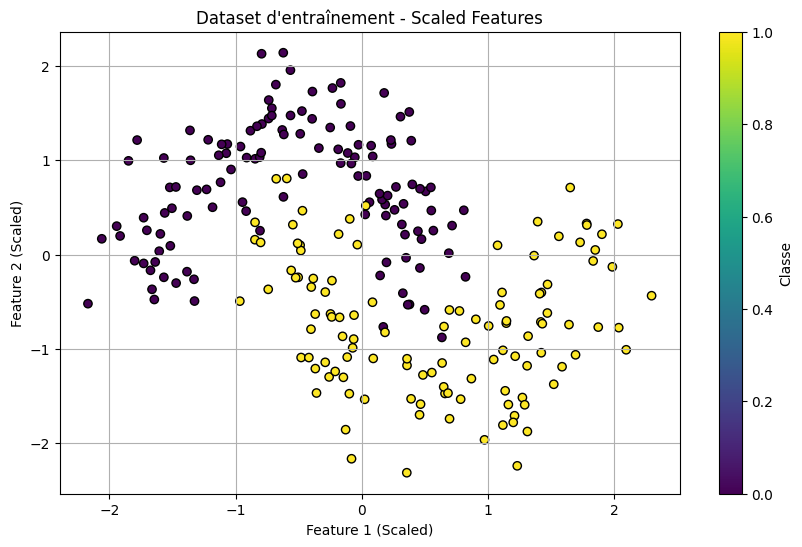

In [26]:

# Générer un dataset non linéairement séparable
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualiser les données d'entraînement (non-scalées)
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title("Dataset d'entraînement - Non-Scaled Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Classe")
plt.grid(True)
plt.show()

# Visualiser les données d'entraînement (scalées)
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title("Dataset d'entraînement - Scaled Features")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.colorbar(label="Classe")
plt.grid(True)
plt.show()

In [27]:

# Créer un dossier pour sauvegarder les modèles
os.makedirs("models", exist_ok=True)


# ➤ Linear Support Vector Classifier
linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train_scaled, y_train)
joblib.dump(linear_svc, "models/linear_svc.pkl")

# ➤ Kernel SVC
kernel_svc = SVC(kernel='rbf', probability=True)
kernel_svc.fit(X_train_scaled, y_train)
joblib.dump(kernel_svc, "models/kernel_svc.pkl")

# ➤ Decision Tree
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
joblib.dump(Tree, "models/decision_tree.pkl")

# ➤ Random Forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
joblib.dump(forest, "models/random_forest.pkl")

# ➤ Convolutional Neural Network (sur données tabulaires 1D)
# Reshape pour Conv1D : (n_samples, n_features, 1)
X_cnn = np.expand_dims(X_train_scaled, axis=-1)

cnn = Sequential([
    InputLayer(input_shape=(X_cnn.shape[1], 1)),
    Conv1D(32, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # 1 output neuron for binary classification
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_cnn, y_train, epochs=20, verbose=0)
save_model(cnn, "models/cnn_model.keras")

print("\n✅ Tous les modèles ont été entraînés et sauvegardés.")


c:\VS_Code\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



✅ Tous les modèles ont été entraînés et sauvegardés.


In [30]:
# Afficher l'accuracy de chaque modèle
linear_svc_score = linear_svc.score(X_test_scaled, y_test)
kernel_svc_score = kernel_svc.score(X_test_scaled, y_test)
tree_score = Tree.score(X_test, y_test)
forest_score = forest.score(X_test, y_test)
cnn_score = cnn.evaluate(X_test_scaled, y_test, verbose=0)[1]
print(f"Accuracy du Kernel SVC: {kernel_svc_score:.2f}")
print(f"Accuracy de l'Arbre de Décision: {tree_score:.2f}")
print(f"Accuracy de la Forêt Aléatoire: {forest_score:.2f}")
print(f"Accuracy du CNN: {cnn_score:.2f}")

Accuracy du Kernel SVC: 0.93
Accuracy de l'Arbre de Décision: 0.88
Accuracy de la Forêt Aléatoire: 0.95
Accuracy du CNN: 0.90
